![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<AxesSubplot:title={'center':'Sentiminetos por aerolínea'}, xlabel='airline'>

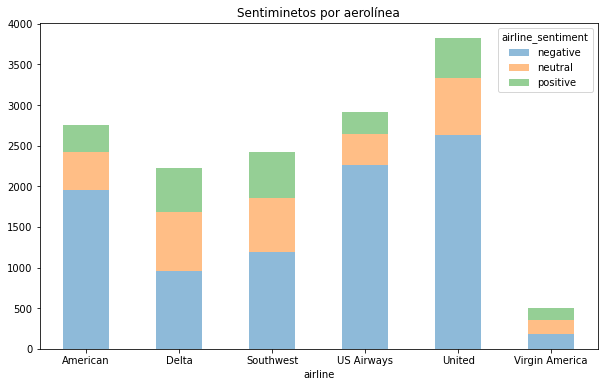

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [9]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
# Celda 1

import re

# Se crea el vectorizador

vectorizer = CountVectorizer()

# Se crean los vectores a partir del texto y el vectorizador

X_traincv = vectorizer.fit_transform(X_train)

# Se utiliza un modelo random forest de clasificación para entrenar el modelo y realizar las predicciones

clf = RandomForestClassifier(random_state = 42)
clf.fit(X_traincv, y_train)
predictions=clf.predict(vectorizer.transform(X_test))

# Se reporta el accuracy del modelo

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
acc_1=accuracy_score(y_test, predictions)
recall_1=recall_score(y_test, predictions, average='macro')

from sklearn.metrics import classification_report
print('Reporte de desempeño del modelo')
print(classification_report(y_test, predictions))
print('Accuracy del modelo usando CountVectorizer:', acc_1)

Reporte de desempeño del modelo
              precision    recall  f1-score   support

          -1       0.78      0.96      0.86      3085
           0       0.69      0.41      0.51       984
           1       0.84      0.47      0.60       763

    accuracy                           0.77      4832
   macro avg       0.77      0.61      0.66      4832
weighted avg       0.77      0.77      0.75      4832

Accuracy del modelo usando CountVectorizer: 0.7711092715231788


#### Comentarios

* El modelo logra predecir correctamente el 77,1% de los datos en test con su categoría correcta. Pero, al analizar el reporte de clasificación, evidenciamos que:
    * En cuanto a la precisión, las clases predichas correctamente (de aquellas que fueron clasificadas para cada clase) es mayor para la clase 1. 
    * En cuanto al recall, el porcentaje de clases correctamente clasificadas como -1 (de las que son realmente -1) es superior al porcentaje para las clases 0 y 1. 
    * El recall de las clases 0 y 1 es bajo comparado con la clase -1 (que tiene más registros en la muestra de test)

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
# Celda 2

# Se crea el vectorizador, con parámetro stop_words = 'english'

vectorizer_2 = CountVectorizer(stop_words='english')

# Se crean los vectores a partir del texto y el vectorizador

X_traincv_2 = vectorizer_2.fit_transform(X_train)

# Se utiliza un modelo random forest de clasificación para entrenar el modelo y realizar las predicciones

clf.fit(X_traincv_2, y_train)
predictions_2=clf.predict(vectorizer_2.transform(X_test))

# Se reporta el accuracy del modelo

acc_2=accuracy_score(y_test, predictions_2)
recall_2=recall_score(y_test, predictions_2, average='macro')
print('Reporte de desempeño del modelo')
print(classification_report(y_test, predictions_2))
print('Accuracy del modelo eliminando stopwords:', acc_2)

Reporte de desempeño del modelo
              precision    recall  f1-score   support

          -1       0.82      0.89      0.85      3085
           0       0.57      0.49      0.53       984
           1       0.71      0.60      0.65       763

    accuracy                           0.76      4832
   macro avg       0.70      0.66      0.68      4832
weighted avg       0.75      0.76      0.75      4832

Accuracy del modelo eliminando stopwords: 0.761796357615894


#### Comentarios

* Comparando esta predicción con el anterior punto, vemos que el accuracy disminuyó un poco, pero también evidenciamos que el recall para las clases 0 y 1 mejoró, haciendo al f1-score un poco mejor, respecto al modelo base.
* Pese a lo anterior, vemos una disminución en la precisión de las dos ultimas clases y del recall para la primera.

Nota: En el punto 5 se muestra un resumen de la comparación de modelos, por lo que el lector podrá contrastar el desempeño de cada uno más fácilemte al final de este documento.

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [13]:
# Celda 3

wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')
nltk.download('punkt')

# Definición de la función que tenga como parámetro texto y devuelva una lista de lemas

def split_into_lemmas(text):
    text = text.lower()                              # Se convierte el texto a minúsculas
    text = re.sub(r'[^a-zA-Z0-9]+', ' ', text)       # Se dejan solo los caracteres alfanuméricos
    tokens = nltk.word_tokenize(text)
    return [wordnet_lemmatizer.lemmatize(token, pos='v') for token in tokens]

# Creación de matrices de documentos usando CountVectorizer, usando como tokenizador la función 'split_into_lemmas'

vect_lemas = CountVectorizer(tokenizer=split_into_lemmas)

# Se crean los vectores a partir del texto y el vectorizador

X_traincv_3 = vect_lemas.fit_transform(X_train)

# Se utiliza un modelo random forest de clasificación para entrenar el modelo y realizar las predicciones

clf.fit(X_traincv_3, y_train)
predictions_3=clf.predict(vect_lemas.transform(X_test))

# Se reporta el accuracy del modelo

acc_3=accuracy_score(y_test, predictions_3)
recall_3=recall_score(y_test, predictions_3, average='macro')
print('Reporte de desempeño del modelo')
print(classification_report(y_test, predictions_3))
print('Accuracy del modelo usando lematización con verbos:', acc_3)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pipes\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pipes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Reporte de desempeño del modelo
              precision    recall  f1-score   support

          -1       0.78      0.96      0.86      3085
           0       0.69      0.40      0.51       984
           1       0.85      0.48      0.61       763

    accuracy                           0.77      4832
   macro avg       0.77      0.61      0.66      4832
weighted avg       0.77      0.77      0.75      4832

Accuracy del modelo usando lematización con verbos: 0.7725579470198676


#### Comentarios

* En este caso se ve una mejora ligera de accuracy con respecto al modelo base (de apenas 0,14%), explicada principalmente por una mejora en la precisión y el recall de la clase que contiene los comentarios positivos. No obstante, la mejora es tan marginal que es difícil sacar conclusiones al respecto.

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [14]:
# Celda 4

# Creación de matrices de documentos usando CountVectorizer, usando como tokenizador la función 'split_into_lemmas' y
# con parámetro stop_words = 'english'

vect_lemas_2 = CountVectorizer(tokenizer=split_into_lemmas, stop_words='english')

# Se crean los vectores a partir del texto y el vectorizador

X_traincv_4 = vect_lemas_2.fit_transform(X_train)

# Se utiliza un modelo random forest de clasificación para entrenar el modelo y realizar las predicciones

clf.fit(X_traincv_4, y_train)
predictions_4=clf.predict(vect_lemas_2.transform(X_test))

# Se reporta el accuracy del modelo

acc_4=accuracy_score(y_test, predictions_4)
recall_4=recall_score(y_test, predictions_4, average='macro')
print('Reporte de desempeño del modelo')
print(classification_report(y_test, predictions_4))
print('Accuracy del modelo eliminando stopwrods y usando lematización con verbos:', acc_4)

Reporte de desempeño del modelo
              precision    recall  f1-score   support

          -1       0.82      0.90      0.85      3085
           0       0.59      0.47      0.52       984
           1       0.73      0.61      0.66       763

    accuracy                           0.77      4832
   macro avg       0.71      0.66      0.68      4832
weighted avg       0.75      0.77      0.76      4832

Accuracy del modelo eliminando stopwrods y usando lematización con verbos: 0.7659354304635762


#### Comentarios

* Al igual que para el modelo en que se eliminaban stopwords únicamente, este modelo reduce el accuracy respecto al modelo base, debido principalmente a una disminución en el recall de comentarios negativos.
* No obstante, el proceso de lematización logra mejorar marginalmente el desempeño con respecto al modelo que solo eliminaba stopwords sin aplicar lematización.

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

Comparación por Accuracy de los 4 modelos


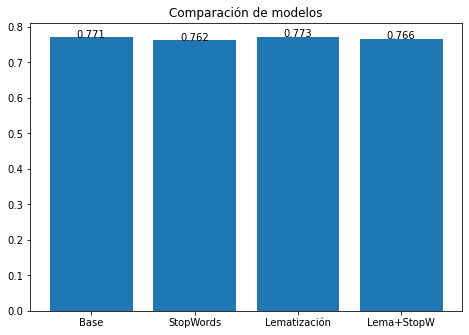

In [15]:
# Celda 5

print('Comparación por Accuracy de los 4 modelos')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['Base', 'StopWords', 'Lematización', 'Lema+StopW']
ejeY = [round(acc_1, 3), round(acc_2, 3), round(acc_3, 3), round(acc_4, 3)]
ax.bar(ejeX,ejeY)

def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i],ha='center')
        
addlabels(ejeX,ejeY,plt)

plt.show()

### Conclusiones

- En este caso, la eliminación de stopwords y la lematización no logran mejorar significativamente el desempeño del modelo de clasificación, incluso, aquellos que eliminan stopwords empeoran el desempeño. El modelo con mejor desempeño es el que utiliza únicamente lematización (sin eliminación de stopwords). No obstante, la mejora en el accuracy sobre el modelo base es de apenas 0,14%.
- A continuación se exhibe una muestra de tokens para los 4 vectorizadores utilizados, que puede ayudar a entender los resultados:

In [16]:
print('Muestra de tokens para vector base:\n', list(vectorizer.vocabulary_.keys())[:10])
print('Muestra de tokens para vector sin stopwords:\n', list(vectorizer_2.vocabulary_.keys())[:10])
print('Muestra de tokens para vector lematizado:\n', list(vect_lemas.vocabulary_.keys())[:10])
print('Muestra de tokens para vector lematizado y sin stopwords:\n', list(vect_lemas_2.vocabulary_.keys())[:10])

Muestra de vocabulario para vector base:
 ['jetblue', 'of', 'course', 'am', 'americanair', 'complt', 'incompetence', 'on', 'flt', '295']
Muestra de vocabulario para vector sin stopwords:
 ['jetblue', 'course', 'americanair', 'complt', 'incompetence', 'flt', '295', 'lav', 'delay', 'pln']
Muestra de vocabulario para vector lematizado:
 ['jetblue', 'of', 'course', 'i', 'be', 'americanair', 'complt', 'incompetence', 'on', 'flt']
Muestra de vocabulario para vector lematizado y sin stopwords:
 ['jetblue', 'course', 'americanair', 'complt', 'incompetence', 'flt', '295', 'lav', 'delay', 'pln']


- Como se observa en la celda anterior, varios de los tokens obtenidos al vectorizar los textos corresponden a deformaciones de palabras como 'complt: complete', 'flt:flight' o 'pln:plane', lo cual es comun en el texto corto limitado por twitter. Estas deformaciones no permiten al lematizador identificar correctamente los lemas de las palabras, lo cual podría estar limitando el beneficio potencial de su uso. Aunque no es evidente en la muestra de tokens anterior, lo mismo podría estar occuriendo para la eliminación de stopwords.
- Al vectorizar el texto utilizando uni-gramas y utilizar eliminación de stopwords se pueden estar eliminando palabras que por sí solas pueden parecer palabras comunes que no aportan a la información del texto, pero que en conjunto con otras palabras, pueden cambiar el significado de una oración. Lo anterior es especialmente relevante en el idioma inglés, donde existen varias expresiones que se componen de dos o más palabras, como por ejemplo, la palabra 'of course'. En este caso, la palabra 'of' es eliminada como un stopword y cambia el contexto de la expresión 'of course = por supuesto' por 'course = curso'.
- Con el fin de hacer los tokens de los modelos no base más reducidos que el modelo base, se programo al lematizador, al igual que el tokenizador por defecto del CountVectorizer, para que preservara solamente los caracteres alfanuméricos del texto, no obstante, esto puede tener una consecuencia inadvertida que es la eliminación de caracteres que representan emojis. Como veremos a continuación, si se utiliza un lematizador que no elimine estos caracteres, el desempeño de los modelos mejora, aunque todavía marginalmente. Es posible que lo anterior se deba a que los emojis y algunos caracteres especiales (como el signo de exclamación) contienen información valiosa sobre el sentimiento de un texto.

Comparación por Accuracy de los 6 modelos


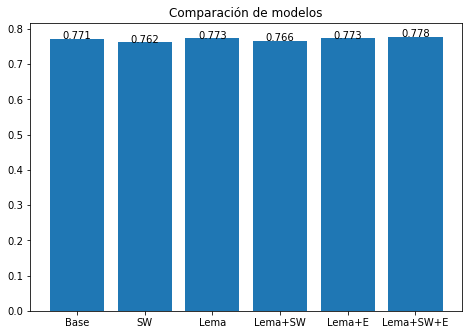

Lema = Lematización, SW = StopWords, E = Emojis y caracteres especiales


In [17]:
# Definición de la función que tenga como parámetro texto y devuelva una lista de lemas (dejando carácteres especiales y emojis)
def split_into_lemmas_no_cleaning(text):
    text = text.lower()                              # Se convierte el texto a minúsculas
    tokens = nltk.word_tokenize(text)
    return [wordnet_lemmatizer.lemmatize(token, pos='v') for token in tokens]

# Creación de matrices de documentos usando CountVectorizer, usando como tokenizador la función 
# 'split_into_lemmas_no_cleaning'

vect_lemas_3 = CountVectorizer(tokenizer=split_into_lemmas_no_cleaning)

# Se crean los vectores a partir del texto y el vectorizador

X_traincv_5 = vect_lemas_3.fit_transform(X_train)

# Se utiliza un modelo random forest de clasificación para entrenar el modelo y realizar las predicciones

clf.fit(X_traincv_5, y_train)
predictions_5=clf.predict(vect_lemas_3.transform(X_test))

# Se reporta el accuracy del modelo

acc_5=accuracy_score(y_test, predictions_5)

# Creación de matrices de documentos usando CountVectorizer, usando como tokenizador la función 
# 'split_into_lemmas_no_cleaning' y con parámetro stop_words = 'english'

vect_lemas_4 = CountVectorizer(tokenizer=split_into_lemmas_no_cleaning, stop_words='english')

# Se crean los vectores a partir del texto y el vectorizador

X_traincv_6 = vect_lemas_4.fit_transform(X_train)

# Se utiliza un modelo random forest de clasificación para entrenar el modelo y realizar las predicciones

clf.fit(X_traincv_6, y_train)
predictions_6=clf.predict(vect_lemas_4.transform(X_test))

# Se reporta el accuracy del modelo

acc_6=accuracy_score(y_test, predictions_6)

# Comparación de modelos

print('Comparación por Accuracy de los 6 modelos')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['Base', 'SW', 'Lema', 'Lema+SW', 'Lema+E', 'Lema+SW+E']
ejeY = [round(acc_1, 3), round(acc_2, 3), round(acc_3, 3), round(acc_4, 3), round(acc_5, 3), round(acc_6, 3)]
ax.bar(ejeX,ejeY)

def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i],ha='center')
        
addlabels(ejeX,ejeY,plt)

plt.show()
print('Lema = Lematización, SW = StopWords, E = Emojis y caracteres especiales')

- Como observamos en la gráfica anterior, el mantener los caracteres especiales y emojis en el texto hace que mejore el desempeño del modelo con lematización y eliminación de stopwords. Este modelo logra un accuracy superior en aproximadamente 0,7% con respecto al modelo base, posiblemente indicando una interacción positiva entre la eliminación de stopwords y la no eliminación de emojis y caracteres especiales. 
- Como conclusión general observamos que por sí solas la eliminación de stopwords y la normalización de textos pueden ser herramientas no muy útiles en ciertos contextos; es necesario combinarlas con otras técnicas de procesamiento de texto para lograr obtener un beneficio significativo a través de ellas. Por ejemplo, el preprocesamiento de palabras deformadas ortográficamente, la utilización de n-gramas para derivar contexto y no eliminar paralabras que por sí solas pueden ser consideradas stopwords, entre otras.